In [1]:
import os
print(os.listdir('flowersrec/flowers/flowers'))

['.ipynb_checkpoints', 'daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
#matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

Using TensorFlow backend.


In [3]:
X=[]
Z=[]
IMG_SIZE=224
FLOWER_DAISY_DIR='flowersrec/flowers/flowers/daisy'
FLOWER_DANDI_DIR='flowersrec/flowers/flowers/dandelion'
FLOWER_ROSE_DIR='flowersrec/flowers/flowers/rose'
FLOWER_SUNFLOWER_DIR='flowersrec/flowers/flowers/sunflower'
FLOWER_TULIP_DIR='flowersrec/flowers/flowers/tulip'

In [4]:
def assign_label(img,flower_type):
    return flower_type

In [5]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [6]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 769/769 [00:01<00:00, 430.20it/s]

769


In [7]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 734/734 [00:01<00:00, 371.48it/s]

1503


In [8]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 984/984 [00:02<00:00, 400.49it/s]

2487


In [9]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

 96%|█████████████████████████████████████████████████████████████████████████▊   | 1012/1055 [00:02<00:00, 399.47it/s]


error: OpenCV(4.3.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [10]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 784/784 [00:01<00:00, 448.64it/s]

4323


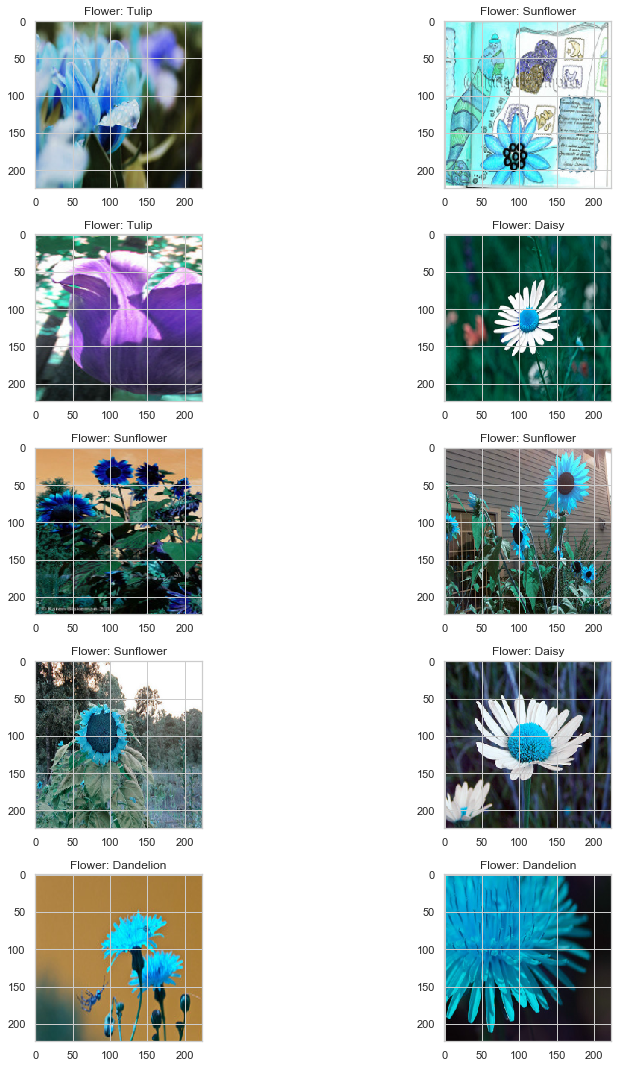

In [11]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

In [12]:
#เป็นการเข้ารหัสเเบบ Array เช่น ให้ rose -> 0 ไล่ไปทีระดับมีทั้งหมด 5 classes
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [13]:
#ตัวเเปรที่ใช้ในการ train เเละ test
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [15]:
#เซตค่าที่ใช้ในการสุ่ม seed
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation , Dropout , Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:
#เริ่มขั้นตอนใช้ CNN 

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [30]:
#model เทส
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=(None,128,3), activation='relu', name='conv_1'))
model.add(Conv2D(32, (3,3), activation='relu', name='conv_2'))
model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_1'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu', name='conv_3'))
model.add(Conv2D(64, (3,3), activation='relu', name='conv_4'))
model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_2'))
model.add(Dropout(0.25))
    
model.add(Conv2D(128, (3,3), padding='same', activation='relu', name='conv_5'))
model.add(Conv2D(128, (3,3), activation='relu', name='conv_6'))
model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_3'))

model.add(Flatten())
model.add(Dense(512, activation='relu', name='dense_1'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', name='dense_2'))
model.add(Activation('softmax'))

ValueError: The last dimension of the inputs to `Dense` should be defined. Found `None`.

In [23]:
#เป็นการใช้ lR หรือ learning Rate เพื่อปรับระดับความเร็วการเรียนรู้ของ neural network
batch_size=32
epochs=10

#target_size=(224,224)
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [24]:
#ตัวป้องกันการเกิด Overfitting
datagen = ImageDataGenerator(
          rescale=1./255,
          rotation_range=40,
          width_shift_range=0.4,
          height_shift_range=0.4,
          shear_range=0.2,
          zoom_range=0.3,
          horizontal_flip=True)

datagen.fit(x_train)
#train_generator = datagen.flow((x_train,y_train),batch_size=batch_size)

In [25]:
#set ค่า optimizer ที่จะใช้ในการ compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
conv_2 (Conv2D)              (None, 222, 222, 32)      9248      
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 111, 111, 64)      18496     
_________________________________________________________________
conv_4 (Conv2D)              (None, 109, 109, 64)      36928     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 54, 54, 64)       

In [29]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))
model.save('model.h5')
print('save model success')

Epoch 1/10


ValueError: A target array with shape (32, 5) was passed for an output of shape (None, 128) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

In [ ]:
loss, accuracy = model.evaluate((x_test, y_test))

In [ ]:
import tensorflow as tf 
new_model= tf.keras.models.load_model('last_model.h5')

In [ ]:
new_model.summary()

In [ ]:
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = tflite_converter.convert()
open("model.tflite", "wb").write(tflite_model)

In [ ]:
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

In [ ]:
model.export(export_dir= '.', with_metadata=True)

In [ ]:
labels = 'daisy\ndandelion\nrose\nsunflower\ntulip\n'
with open('labels.txt', 'w') as f:
  f.write(labels)

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [ ]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        count+=1

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[mis_class[count]])])))
        plt.tight_layout()
        count+=1

In [ ]:
score = model.evaluate_tflite('tf_lite_model.tflite', (x_test, y_test))